# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import random
import scipy

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    Cluster_Distance = pd.DataFrame()
    if Distance_Type=="Ecluidian distance":
        #calculate ecluidian distance
        for i in range(len(Cluster_Centroids)):
            array=[]
            for j in range(len(Data_points)):
                dist=np.linalg.norm(Data_points[j] - Cluster_Centroids[i])
                array = np.append( array,dist)
            Cluster_Distance[i]=array      
    else:
        
        #calculate pearson distance
        Cluster_Distance= pd.DataFrame(scipy.spatial.distance.cdist(Data_points,Cluster_Centroids,"correlation"))
       
        #for i in range(len(Data_points)):
            #array=[]
            #point_mean=np.mean(Data_points[i], axis=0)
            #point_diff=Data_points[i]-point_mean
            #sum1=np.sum(point_diff**2)
            #for j in range(len(Cluster_Centroids)):
                #centroid_mean=np.mean(Cluster_Centroids[j], axis=0)
                #centroid_diff=luster_Centroids[j]-centroid_mean
                #sum2=np.sum(centroid_diff**2)
                #denominator=np.sqrt(sum1*sum2)
                #numerator=np.sum(point_diff*centroid_diff)
                #pearson_dist=1-(numerator/denominator)
                #array = np.append( array,pearson_dist)
            #Cluster_Distance[i]=array  
        
            
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    Cluster_Metric=float('inf')
    #loop to find minimum distortion function, I only entered the loop 10 times because when i enter it 100 times it takes infinty to run
    for i in range(10):
        
       # code for intial cluster heads 
        cluster_heads=[]
        for i in range(Number_of_Clusters) :
            n = random.randint(0,len(Data_points) -1)
            point=Data_points[n]
            cluster_heads.append(point)
            
       # loop to find best centroids 
        flag=True
        while  flag==True:
            
            #Cluster Assginmnet
            Cluster_Distance= GUC_Distance(cluster_heads, Data_points, Distance_Type ) 
            clusters=[]
            initial_Cluster_Distance=[]
            for i in range(len(Cluster_Distance)):
                
                index=int(np.argmin(Cluster_Distance.iloc[i]))
                dist=(Cluster_Distance.iloc[i]).min()
                clusters=np.append(clusters,int(index))
                initial_Cluster_Distance=np.append(initial_Cluster_Distance,dist)
            
           
            
            #updating centroids
            new_centroids=[]
            for i in range(Number_of_Clusters):
                
                points=[]
                for j in range(len(Data_points)):
                    if clusters[j]==i :
                        points.append(Data_points[j])
                if points==[]:
                    new_centroids.append([0,0])
                else:
                    new_centroids.append(np.mean(points, axis=0)) 
                    
                    
            if np.array_equal(new_centroids,cluster_heads): #stop if new centroids=old centroids
                flag=False
            else:
                cluster_heads=new_centroids
               
           
        #calculating cluster metric (distortion function)
        sum=0
        for i in range (len(initial_Cluster_Distance)):
            dist=initial_Cluster_Distance[i]
            sum=sum+((dist)**2)
        initial_Cluster_Metric=sum/ len(Data_points)
        

        #selecting best centroids using Distortion function
        if initial_Cluster_Metric<Cluster_Metric:
            Cluster_Metric=initial_Cluster_Metric
            Final_Cluster_Distance=initial_Cluster_Distance
            Final_clusters=clusters
            Final_cluster_heads=cluster_heads
        
        
    #displaying clusters
    df = pd.DataFrame(dict(x=Data_points[:,0], y=Data_points[:,1], label=Final_clusters.astype(int)))
    colors = {0:'blue', 1:'red', 2:'green',3:'orange',4:'cyan',5:'pink',6:'yellow',7:'purple',8:'gray',9:'olive'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(np.array(Final_cluster_heads)[:, 0], np.array(Final_cluster_heads)[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()
        
    return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

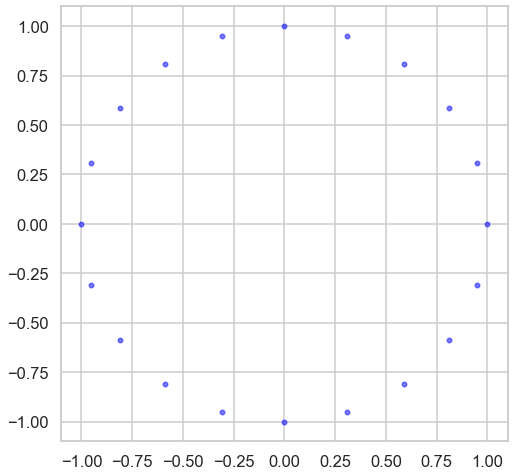

In [6]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

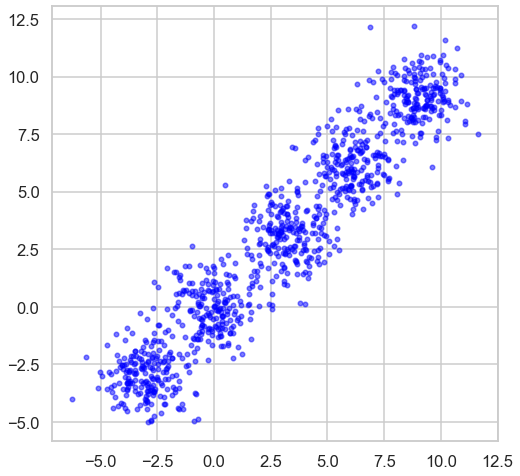

In [7]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)


#### 2.3. Example 3 : moons Data Gen and display 

array([[ 2.07353579,  0.47644691],
       [ 1.75736216,  0.03357357],
       [ 0.29011273, -0.29539003],
       ...,
       [-1.01361974,  0.20452365],
       [ 0.29452944,  1.09649632],
       [ 0.12935502,  0.40644383]])

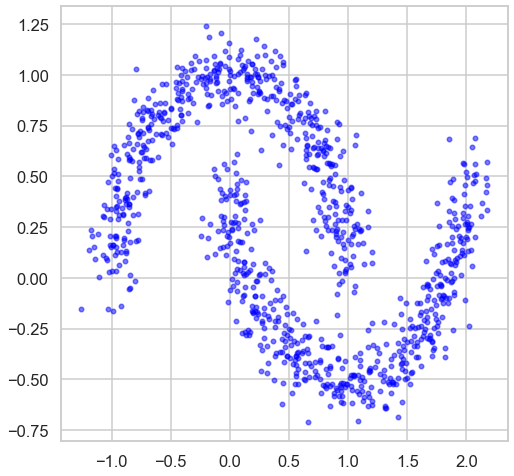

In [8]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)
X3

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

For K=2


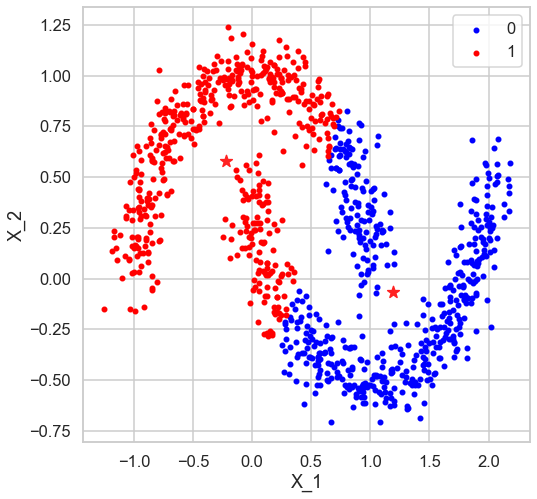

Final Cluster Distance:[1.03528174 0.57470965 0.93003689 0.43868353 0.56045054 0.86522526
 0.28545129 0.6615313  0.74368642 0.58059113 0.31684871 0.87322733
 0.65949914 0.61595559 0.44738654 0.46398587 0.91029323 0.35927552
 0.64713017 0.69952802 0.76752096 0.58579676 0.81227433 0.68181821
 0.61424246 0.78464285 0.75898621 0.70156644 0.27184537 0.83326134
 0.16984062 0.51514655 0.8618108  0.76674139 0.7263806  0.40248764
 0.42834314 0.32935964 0.78137988 0.50272209 0.45384591 0.49619139
 0.43129918 0.25408792 0.66150136 0.52030717 0.50521746 0.8306628
 0.88057957 1.01137328 0.30505107 0.62642575 0.35165095 0.60596074
 0.47470398 0.13913025 0.72653705 0.76933961 0.49510267 0.5642172
 0.46692446 0.90277158 0.44829059 0.53934971 0.74765427 1.00005108
 0.40752579 0.96534528 0.36718432 1.03670493 0.31273757 0.82280088
 0.6048022  0.71251534 0.31889812 0.55032496 0.57634034 0.3860912
 0.59083206 0.63770122 0.40536988 0.73428744 0.3225912  0.44010399
 0.98192869 0.4919102  0.84579152 0.558789

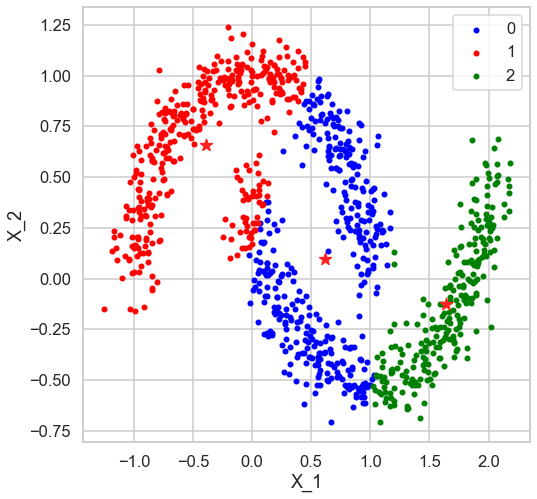

Final Cluster Distance:[0.74260123 0.19847437 0.5112074  0.33109104 0.14198286 0.72640585
 0.10149327 0.57042573 0.40442317 0.69255828 0.58990984 0.5574456
 0.47293868 0.71024078 0.31643038 0.62368994 0.55902182 0.3329232
 0.77164165 0.49326152 0.2829516  0.14905765 0.31363421 0.27307334
 0.71423789 0.63032033 0.50087794 0.51025462 0.15822306 0.57024101
 0.35447589 0.70681612 0.53779308 0.61941033 0.8496054  0.28695056
 0.49409982 0.31505586 0.65467736 0.71550296 0.60577419 0.45300896
 0.57203704 0.19781585 0.4911279  0.34816432 0.49504983 0.5958827
 0.41352539 0.88888956 0.49436562 0.35599506 0.45932725 0.49771557
 0.59227884 0.48308779 0.51941632 0.50385947 0.25120625 0.38582624
 0.27639465 0.59571526 0.59504996 0.64820699 0.70700163 0.83666339
 0.41339883 0.69625891 0.51877098 0.69895785 0.43148523 0.56891223
 0.24410754 0.50874242 0.44218409 0.52922941 0.68484735 0.4322788
 0.66219313 0.5043749  0.56158496 0.61349492 0.49339696 0.35745613
 0.73734148 0.36773943 0.71810639 0.3693802

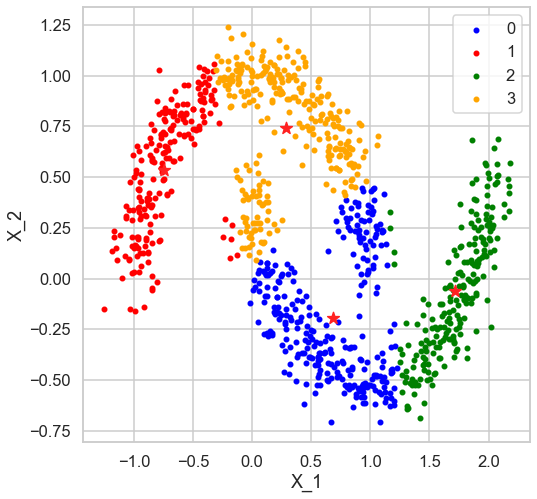

Final Cluster Distance:[0.64290424 0.10123313 0.40559238 0.59265021 0.03805723 0.63636013
 0.28086975 0.64338795 0.48460659 0.17542632 0.45524527 0.45724213
 0.25260105 0.25176187 0.49967421 0.65858965 0.45558827 0.52491533
 0.16624086 0.23071372 0.2699975  0.16065078 0.31398819 0.16987125
 0.23134025 0.26031204 0.26689027 0.59964679 0.48038011 0.47780619
 0.37788693 0.55568618 0.43689085 0.34751197 0.23278121 0.38841705
 0.22925717 0.50345819 0.28993345 0.44581682 0.68288059 0.58970808
 0.30848104 0.27936691 0.58619355 0.45174029 0.53680343 0.51617936
 0.36292177 0.52230233 0.417534   0.59864785 0.58002195 0.62060303
 0.69948343 0.53794021 0.57703452 0.41325418 0.46584385 0.09573182
 0.26944475 0.49603355 0.6973087  0.66344813 0.21996913 0.75518161
 0.51626034 0.44757307 0.64036395 0.59569611 0.53340325 0.47817337
 0.29489952 0.43138106 0.54714994 0.23689555 0.1869445  0.377083
 0.08314332 0.22685549 0.39347534 0.25756438 0.55312272 0.45744228
 0.45580286 0.46320822 0.3183277  0.24376

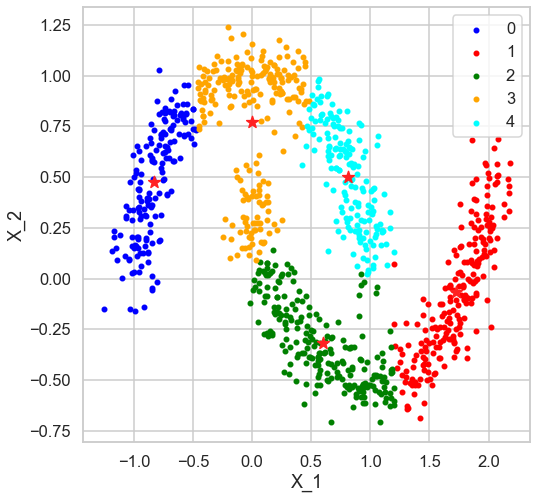

Final Cluster Distance:[0.64924349 0.10842542 0.30939619 0.42175068 0.04276511 0.27992559
 0.38389519 0.61338087 0.47656967 0.2936027  0.50546577 0.46353706
 0.28665491 0.32460785 0.24666193 0.61708537 0.46090894 0.2574382
 0.36916573 0.08106212 0.27143723 0.15290501 0.30434987 0.17355749
 0.32348538 0.17473587 0.11827067 0.06503508 0.35077517 0.48498939
 0.21668145 0.55139077 0.44305279 0.2054018  0.44754144 0.38274765
 0.26191368 0.22982829 0.18682067 0.43377649 0.6251858  0.35979269
 0.32454033 0.27885914 0.57297608 0.54053536 0.56977387 0.16732905
 0.30794455 0.41866844 0.36979334 0.09173668 0.33891953 0.61849904
 0.69545208 0.54038409 0.07325755 0.42058459 0.24328601 0.08022912
 0.36075383 0.50240929 0.63015739 0.6674862  0.4296746  0.76283832
 0.51090666 0.29604204 0.55350952 0.60108754 0.36809247 0.48547201
 0.28703555 0.43917984 0.3642154  0.19191135 0.28775733 0.15496948
 0.36867977 0.39744945 0.4201969  0.15852731 0.47540027 0.4514681
 0.33519743 0.45667919 0.38262989 0.31443

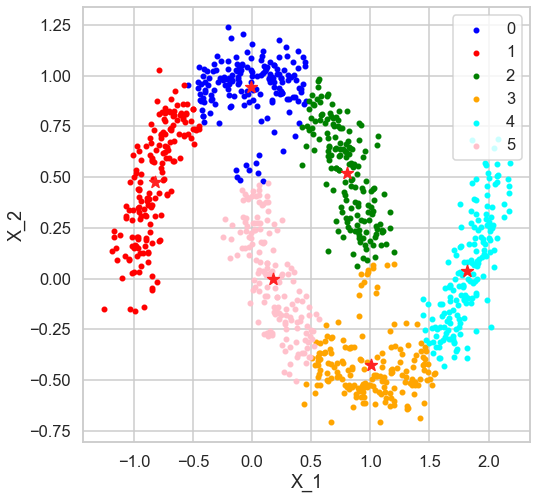

Final Cluster Distance:[0.50670071 0.06215521 0.31607459 0.35664436 0.1026608  0.26618683
 0.38126743 0.11814953 0.05535399 0.26819579 0.11501033 0.32107421
 0.28655022 0.25563985 0.27028585 0.25387904 0.31558738 0.19179015
 0.36028903 0.4288764  0.27057857 0.26244725 0.22873378 0.04969631
 0.26676305 0.17745505 0.49727804 0.06074108 0.36425733 0.35460906
 0.38381756 0.16683617 0.29976706 0.43712843 0.42667762 0.47143093
 0.16913911 0.18427598 0.189169   0.09682352 0.28322293 0.23093376
 0.09427598 0.40011297 0.04646076 0.53891853 0.2255902  0.1457099
 0.23603456 0.4211844  0.43054056 0.10931219 0.36241137 0.09414936
 0.38071986 0.53847532 0.06010495 0.29517071 0.26444892 0.35879906
 0.3589799  0.36043902 0.30270895 0.26638031 0.40655551 0.64532169
 0.36130399 0.27270403 0.36135887 0.45573803 0.39208263 0.35797597
 0.40542224 0.33729365 0.38808994 0.23767754 0.25523877 0.04064421
 0.44116178 0.38265112 0.37907872 0.16040002 0.37854521 0.44143678
 0.31213951 0.48343562 0.35853704 0.3133

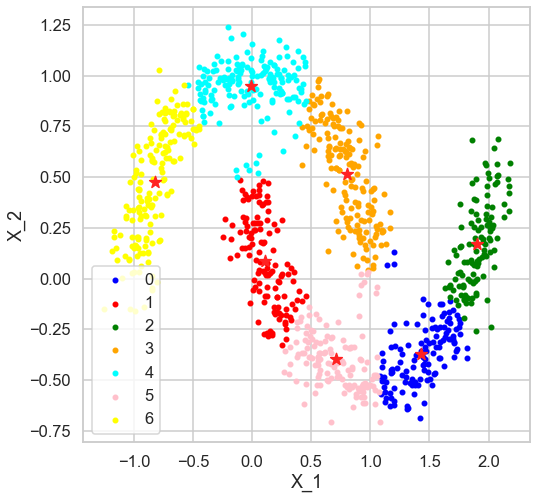

Final Cluster Distance:[0.34781749 0.2024271  0.42137928 0.35588236 0.26092474 0.27113994
 0.38126743 0.11888448 0.15698276 0.26896528 0.33079116 0.16253233
 0.28655022 0.25479292 0.2639601  0.15064717 0.16324784 0.19203271
 0.36116935 0.13359871 0.3700255  0.35876754 0.33090437 0.15267034
 0.26634747 0.17745505 0.20197533 0.06292273 0.36623786 0.21316591
 0.38941299 0.39735967 0.14078111 0.18288813 0.42693323 0.03850877
 0.16290153 0.18546611 0.189169   0.30064766 0.18469578 0.22777438
 0.20546713 0.27172361 0.07211033 0.53891853 0.13997909 0.15197614
 0.34485142 0.4211844  0.3289634  0.10337973 0.35697724 0.01504428
 0.30025255 0.50103071 0.06452828 0.16836787 0.2581698  0.11536642
 0.3589799  0.2021317  0.20667648 0.32903682 0.41175827 0.51246905
 0.09424494 0.27906641 0.25643155 0.3010672  0.38630678 0.22125486
 0.28974178 0.24696222 0.3824093  0.05934182 0.255838   0.04379553
 0.44430749 0.38469411 0.29138222 0.16040002 0.26972309 0.0569598
 0.31850755 0.10430296 0.36442598 0.3133

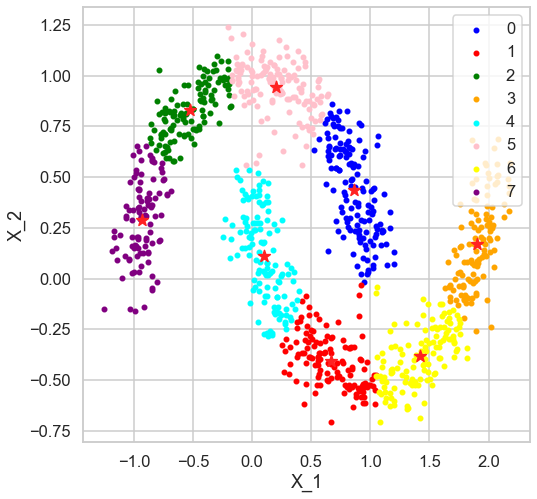

Final Cluster Distance:[0.35088483 0.19932759 0.39555976 0.22903339 0.25780913 0.32540297
 0.17125966 0.13599293 0.18198059 0.06032769 0.31493244 0.16556355
 0.33271083 0.05969085 0.17515985 0.12910953 0.16625    0.34117596
 0.1510492  0.09595942 0.38306188 0.37933159 0.35504011 0.14985992
 0.05868753 0.22011232 0.16435625 0.11290873 0.17569052 0.21545312
 0.45594057 0.37643917 0.14385466 0.1517807  0.21317532 0.05887616
 0.20101983 0.34390044 0.06862747 0.33286148 0.16524146 0.40593174
 0.24357691 0.28658275 0.09816706 0.1349606  0.12174712 0.23747142
 0.37101764 0.24476217 0.30371323 0.0806971  0.26101059 0.04084411
 0.28674065 0.49620313 0.13385037 0.17001059 0.18755945 0.1169209
 0.12086642 0.20515024 0.18810514 0.30785316 0.33180017 0.51466765
 0.07300715 0.37001591 0.23310712 0.30414877 0.28956332 0.22337906
 0.30685963 0.24768781 0.28571441 0.09530955 0.04528505 0.24900352
 0.2852842  0.44131351 0.26996116 0.05446844 0.24360034 0.05034288
 0.4080076  0.10269714 0.41249831 0.2199

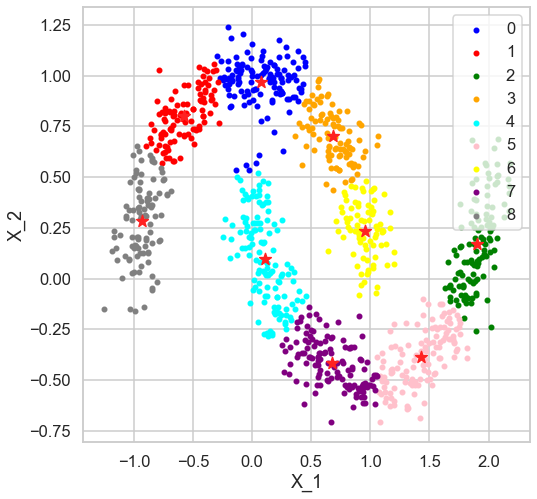

Final Cluster Distance:[0.35088483 0.19932759 0.4044567  0.28360441 0.25780913 0.24199982
 0.16576008 0.12898448 0.16921629 0.18840655 0.32674339 0.16556355
 0.27828345 0.16662136 0.06930682 0.14052666 0.16625    0.27983324
 0.28048744 0.10332143 0.38112651 0.37058598 0.34251289 0.14985992
 0.17920365 0.22566563 0.17133008 0.22684872 0.22591325 0.21545312
 0.42509328 0.38482558 0.14385466 0.14682904 0.34210418 0.05090006
 0.19981457 0.27389793 0.07337626 0.32341773 0.17584242 0.29676699
 0.23844237 0.28940007 0.08593916 0.15097053 0.12864539 0.11621559
 0.35814354 0.24140637 0.31524476 0.24234859 0.10117055 0.0279722
 0.29487506 0.29598941 0.2011683  0.17001059 0.13881181 0.12854462
 0.06437637 0.20515024 0.19835869 0.31350574 0.20708524 0.51466765
 0.07952096 0.09271421 0.24527621 0.30414877 0.09031252 0.22337906
 0.29564183 0.24768781 0.09521647 0.08900067 0.17418645 0.12936921
 0.32571881 0.30192363 0.27893276 0.06122416 0.25648555 0.04155463
 0.13114152 0.0923761  0.14330207 0.1652

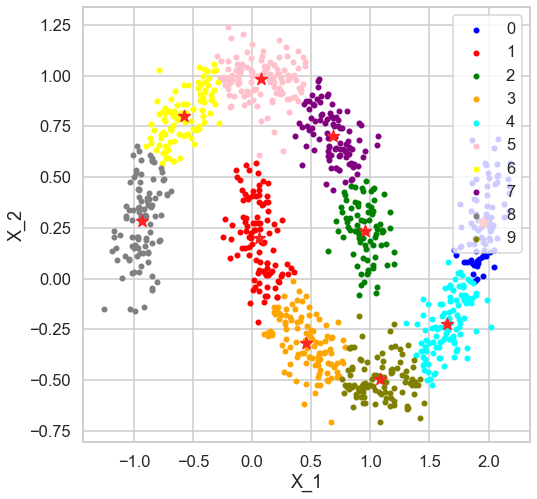

Final Cluster Distance:[0.23184017 0.27782032 0.1710403  0.28360441 0.21003827 0.24199982
 0.16576008 0.22057114 0.27692941 0.18928919 0.12664292 0.04634039
 0.27828345 0.16167187 0.06930682 0.08716309 0.08503335 0.28560716
 0.28074369 0.13988932 0.20937276 0.1070241  0.22424731 0.26745309
 0.17577035 0.22566563 0.08946184 0.22684872 0.22591325 0.12577393
 0.37822694 0.07572518 0.02575841 0.2367006  0.33998507 0.2255568
 0.27447715 0.28114848 0.07337626 0.10644611 0.12569725 0.29587995
 0.19722397 0.24164096 0.19736402 0.15097053 0.08999871 0.11621559
 0.18976347 0.24140637 0.2085037  0.24234859 0.10117055 0.1396026
 0.26135556 0.29598941 0.2011683  0.11910193 0.13881181 0.21458768
 0.06437637 0.08599664 0.14902689 0.16073291 0.20708524 0.41804021
 0.2857561  0.09271421 0.1595807  0.1993685  0.09031252 0.14032385
 0.15077357 0.22051628 0.09521647 0.32056684 0.17466927 0.13839064
 0.32571881 0.30192363 0.19486795 0.06122416 0.14806707 0.28903177
 0.13114152 0.28883803 0.14330207 0.16525

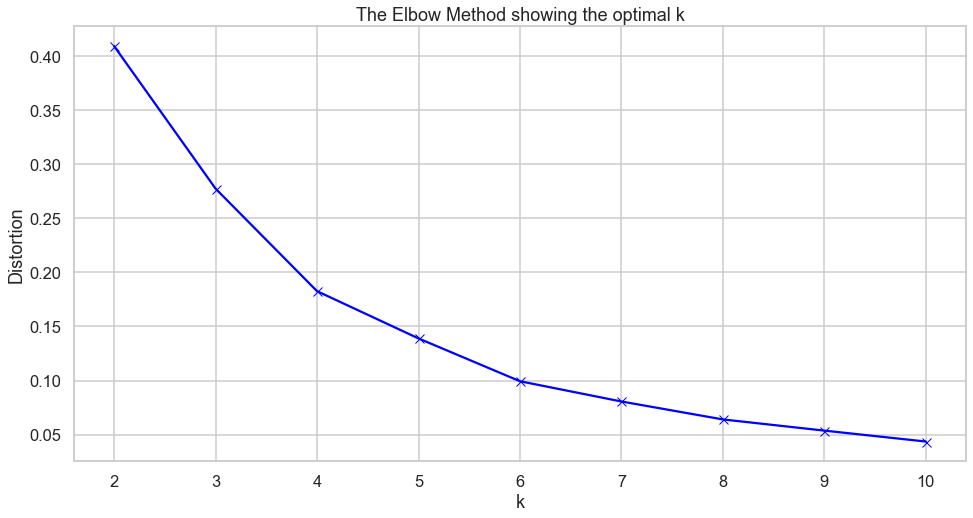

[0.40884473988081904, 0.2772206450542431, 0.1825449705954057, 0.1388959131988334, 0.09934459704532439, 0.08064787074518578, 0.06407978854576851, 0.05374544976020488, 0.04366478721198032]


In [9]:
#Example 3 (Ecluidian distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={}'.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( X3, i, "Ecluidian distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)


In [ ]:
#Conclusion
#best k value is k=7 or k=6

For K=2 


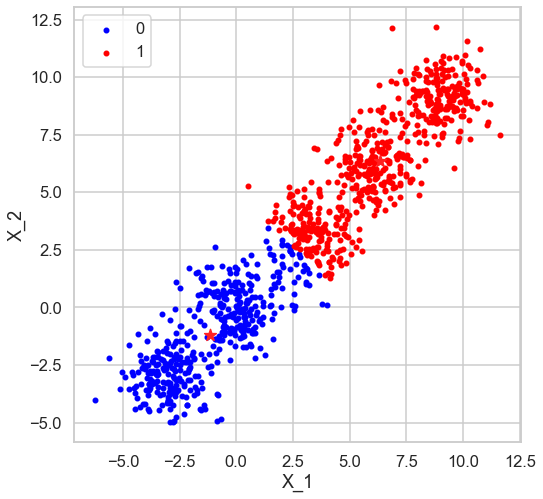

Final Cluster Distance:[2.35464731 1.20786294 2.89780152 1.06880951 2.61731502 3.22367102
 4.04299012 4.26572304 3.20393566 4.22169889 2.06509621 3.67824412
 2.91174854 3.2996335  3.20571779 2.42344566 3.40316839 3.18971129
 4.09864238 3.53790505 1.96282439 2.86394479 4.15709195 2.40248695
 3.86513388 2.65582332 2.77012826 1.18071223 3.40045642 1.70706718
 3.04448292 4.19515187 1.10553683 2.05734969 2.85495737 1.48478044
 1.87310464 4.54934624 2.72931982 4.17148233 2.50442427 2.35193865
 3.50044674 1.73500931 2.68425051 1.91790889 3.30613533 3.9503372
 2.17272988 2.73362715 3.93003953 3.39102879 2.42964438 1.63516513
 2.44760479 4.1660017  1.87889901 2.51511011 3.50831443 1.25563998
 2.90658177 3.23747727 1.29223765 3.68050583 2.88257747 3.79442439
 3.17762176 2.75293259 3.36497087 3.20205949 1.67086156 3.79389627
 1.86872537 4.37530092 1.99323642 2.14593536 2.95656145 2.94960527
 1.33536322 3.22535559 2.97673546 2.71138454 1.63829723 1.00317951
 3.2918398  3.7729994  2.39939053 1.8299

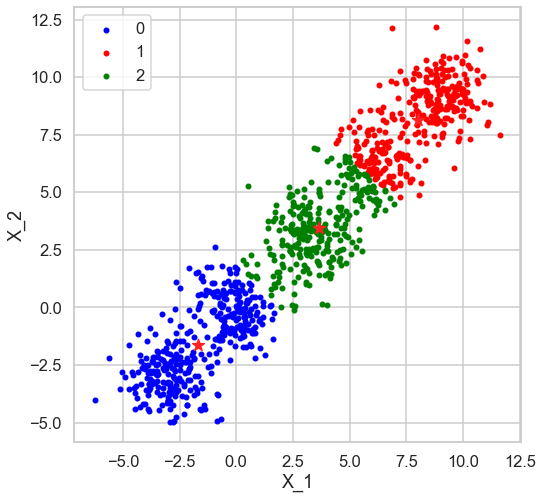

Final Cluster Distance:[1.72865185 0.68889481 2.24250796 0.66521614 1.97765192 2.56836113
 3.46654163 3.61354907 2.56666559 3.57397578 1.61301197 3.07313705
 2.25721461 2.66920526 2.548096   1.98038934 2.78014663 2.64910644
 3.52097447 2.90238459 1.34273722 2.21244244 3.50059957 1.81153243
 3.2924881  2.02821924 2.14154459 0.53535243 2.74333706 1.07017827
 2.38686043 3.54069728 0.509808   1.4439104  2.24191161 0.97313253
 1.36995893 3.98091555 2.0847626  3.58591485 1.85037803 1.90548268
 2.84287468 1.12779694 2.04467065 1.29215978 2.64850902 3.3207572
 1.51846477 2.08398575 3.27673652 2.74522419 1.77578601 1.33175728
 1.80284603 3.53291184 1.66225294 1.85938179 2.88787496 0.65382715
 2.35087794 2.78383467 1.09343135 3.02288482 2.2458879  3.15795604
 2.55082426 2.24753868 2.70753633 2.66065791 1.09675819 3.16404495
 1.2191481  3.72071401 1.34697564 1.48911546 2.30786381 2.3340596
 1.05762335 2.61532676 2.37193221 2.20752262 1.03222742 0.71828051
 2.64804742 3.11685186 1.74288212 1.18263

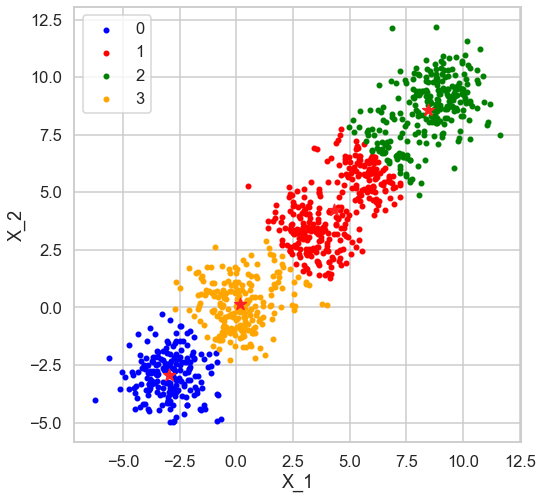

Final Cluster Distance:[0.50838411 1.59612616 0.38732587 1.70987527 0.69627852 0.71302687
 1.97821183 1.85563377 1.07087897 1.73758483 1.46668919 1.47841592
 0.5730218  1.2201313  0.71496943 1.90546098 1.11147895 1.50260269
 2.02106221 1.36151149 0.72250424 0.38134774 1.69119051 1.1156367
 1.8437308  0.53010266 0.89762369 1.33485784 0.93773972 0.97175648
 0.55848404 1.6858937  1.52227204 0.95546714 0.77480495 1.52242924
 1.51281955 2.75491127 0.35738615 2.04171376 0.3907061  1.56053517
 1.00186757 0.93142122 0.72133564 0.91834592 0.82134248 1.57309324
 0.3411393  0.2883999  1.51694793 0.93132571 0.39768236 1.86443731
 0.26459597 1.94611121 2.41041305 0.33059587 1.22324752 1.31770172
 1.22965494 2.00328971 2.20981327 1.19011948 0.56144195 1.57645131
 1.16645259 1.77027301 0.89171344 1.50636672 1.27019099 1.63848511
 0.76544609 1.86571946 0.55293336 0.36958576 0.72812679 0.81266655
 1.88755581 1.35842232 1.24078822 1.43069201 1.00429171 2.00834811
 0.85114124 1.2619837  0.30587294 0.8137

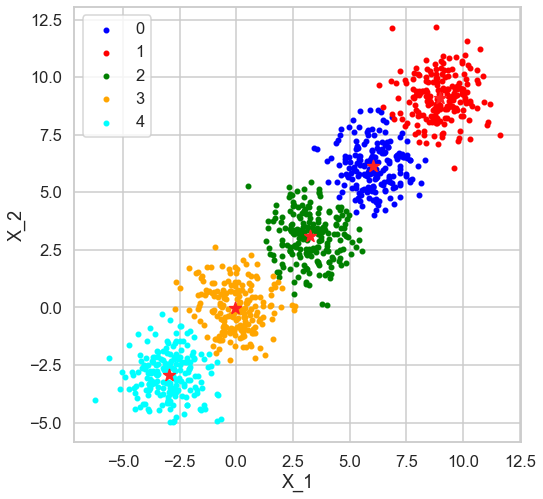

Final Cluster Distance:[0.51624292 1.60465393 0.37679368 1.72133017 0.69238931 0.70239228
 1.97455675 1.84423512 1.06202101 1.72792973 1.47597188 1.47390043
 0.56321643 1.21142698 0.70353978 1.90665577 1.10631443 1.50403881
 2.01720299 1.35171607 0.73354292 0.37307998 1.67974356 1.11553463
 1.84077769 0.53205689 0.8925759  1.34586744 0.92629406 0.97965774
 0.54702906 1.67533783 1.5318002  0.95928972 0.77502021 1.52947354
 1.51727862 2.74630864 0.35456323 2.03723079 0.3881202  1.56843989
 0.99054237 0.94277096 0.71651161 0.92404002 0.80989911 1.56568664
 0.35233057 0.2829995  1.50557505 0.92279852 0.39724598 1.87511427
 0.27151044 1.93554821 2.41543164 0.32757861 1.21793443 1.32907243
 1.23236975 2.00693211 2.21715573 1.17873468 0.55810948 1.56612883
 1.15854943 1.76886817 0.88025838 1.50770488 1.27666151 1.62853933
 0.77328274 1.85513136 0.56438627 0.37978337 0.71929717 0.81158242
 1.89875542 1.35130783 1.23532959 1.4359851  1.0157185  2.01692872
 0.84328041 1.25112402 0.30716255 0.821

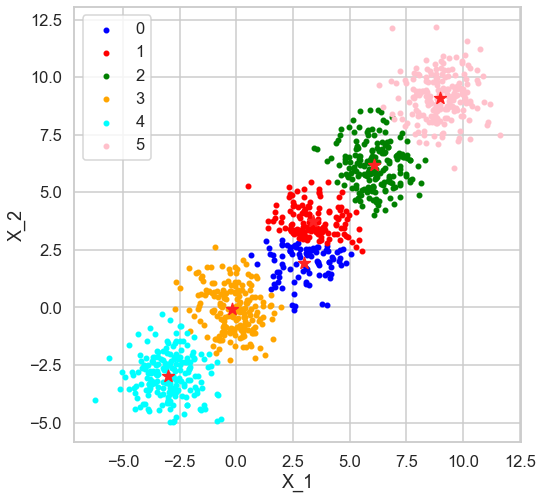

Final Cluster Distance:[0.51725183 1.61539734 0.36644022 1.72966238 0.6960697  0.69211383
 1.96549959 1.83660588 1.0599366  1.71724007 1.4788404  1.46441188
 0.55970472 1.20955342 0.69477215 1.91429649 1.09653396 1.49843484
 2.00803717 1.34813683 0.73986024 0.36237356 1.67114627 1.12230232
 1.8321135  0.52699891 0.89508922 1.35577252 0.9182456  0.99033073
 0.53867953 1.66500472 1.54250865 0.96850688 0.76852075 1.53996022
 1.52679271 2.7445349  0.3461078  2.02775052 0.39308206 1.56937507
 0.98127163 0.95017645 0.71928065 0.93409666 0.80126519 1.55512558
 0.36195743 0.27320041 1.49810848 0.91205904 0.40390379 1.88048747
 0.27155544 1.93049243 2.42519181 0.33221459 1.20808669 1.33819956
 1.2278584  2.00322614 2.22771386 1.16968906 0.5492959  1.56157594
 1.15776921 1.77461254 0.87194478 1.50202178 1.28698321 1.62468764
 0.78394704 1.8448206  0.57291356 0.39029929 0.71729637 0.80414498
 1.90553068 1.35149886 1.23738442 1.43392178 1.02361089 2.0276752
 0.83262949 1.24104561 0.31505418 0.8322

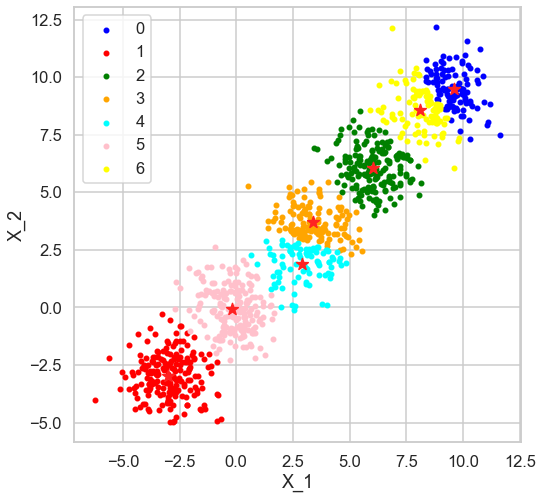

Final Cluster Distance:[0.51725183 1.61539734 0.36644022 1.72966238 0.6960697  0.69211383
 1.96549959 1.83660588 1.0599366  1.71724007 1.4788404  1.46441188
 0.55970472 1.20955342 0.69477215 1.91429649 1.09653396 1.49843484
 2.00803717 1.34813683 0.73986024 0.36237356 1.67114627 1.12230232
 1.8321135  0.52699891 0.89508922 1.35577252 0.9182456  0.99033073
 0.53867953 1.66500472 1.54250865 0.96850688 0.76852075 1.53996022
 1.52679271 2.7445349  0.3461078  2.02775052 0.39308206 1.56937507
 0.98127163 0.95017645 0.71928065 0.93409666 0.80126519 1.55512558
 0.36195743 0.27320041 1.49810848 0.91205904 0.40390379 1.88048747
 0.27155544 1.93049243 2.42519181 0.33221459 1.20808669 1.33819956
 1.2278584  2.00322614 2.22771386 1.16968906 0.5492959  1.56157594
 1.15776921 1.77461254 0.87194478 1.50202178 1.28698321 1.62468764
 0.78394704 1.8448206  0.57291356 0.39029929 0.71729637 0.80414498
 1.90553068 1.35149886 1.23738442 1.43392178 1.02361089 2.0276752
 0.83262949 1.24104561 0.31505418 0.8322

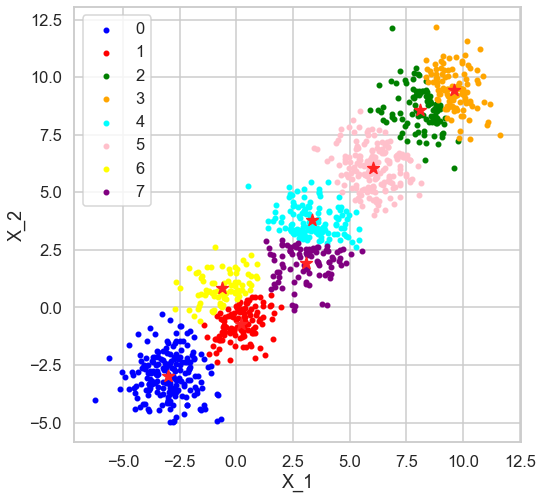

Final Cluster Distance:[0.5320463  1.61935299 0.35830206 1.74231339 0.68425025 0.6835802
 1.96947588 1.82321318 1.04494469 1.71114381 1.49393028 1.46724483
 0.54460753 1.19459908 0.68272237 1.90750034 1.09848591 1.50840476
 2.01173382 1.33304347 0.75418278 0.35951289 1.65884429 1.11412276
 1.83702733 0.53774413 0.88225278 1.36563079 0.90527545 0.9932175
 0.52606523 1.65664505 1.54847698 0.96517308 0.77738046 1.54131523
 1.52423276 2.72959443 0.3518143  2.03057977 0.38271607 1.58412039
 0.97005146 0.96376091 0.70666557 0.93343171 0.78902072 1.55343328
 0.37256234 0.2754852  1.48456955 0.9083972  0.3957733  1.89523445
 0.28607936 1.91563531 2.42336526 0.32153207 1.20979654 1.34971458
 1.23907839 2.01519743 2.22952423 1.15806727 0.55405447 1.54659706
 1.14311007 1.76496451 0.85928148 1.51189328 1.28744123 1.60961153
 0.78677203 1.83636422 0.58532969 0.39797927 0.70232478 0.81154068
 1.91958684 1.33722406 1.22419094 1.44720683 1.036748   2.03170962
 0.83024238 1.23176604 0.30910685 0.83514

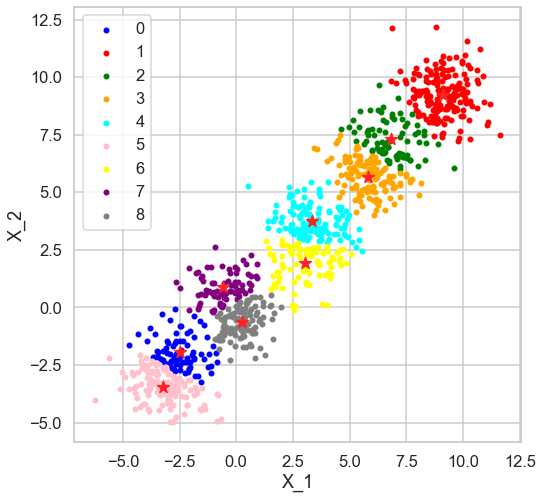

Final Cluster Distance:[0.79075232 0.46365335 0.23348116 1.08828151 1.03968184 0.24110106
 1.51867249 1.50559418 1.1116427  1.16755523 1.59816777 1.00034261
 0.66188031 1.25423579 0.41709417 1.37783311 0.62623587 1.28823417
 1.55339477 1.28998831 0.92466683 0.19750063 1.28133062 0.99557646
 1.41392496 0.55255957 1.17085024 0.51612574 0.63683411 0.22581175
 0.38118897 1.14575634 0.39644386 0.61081656 0.61042627 0.49600937
 0.75300193 2.72208157 0.35218981 1.55235637 0.82443498 1.7009792
 0.58718255 0.83621054 1.02765092 0.45007166 0.49964573 1.01056195
 0.84661531 0.32540828 1.19396146 0.3559382  0.87350407 1.62295404
 0.62018221 1.75278316 1.46870136 0.76944902 0.72601876 0.68773493
 1.10558185 1.87466113 1.11833977 0.77456466 0.32399711 1.43236165
 1.2613018  1.53033943 0.57943382 1.28684317 0.38617468 1.53091915
 0.40069663 1.32563831 0.77644974 0.78050486 0.83599801 0.57153894
 1.45975063 1.48391817 1.46272743 1.42541195 0.78739746 0.87212954
 0.28734532 0.75272351 0.82140905 0.3566

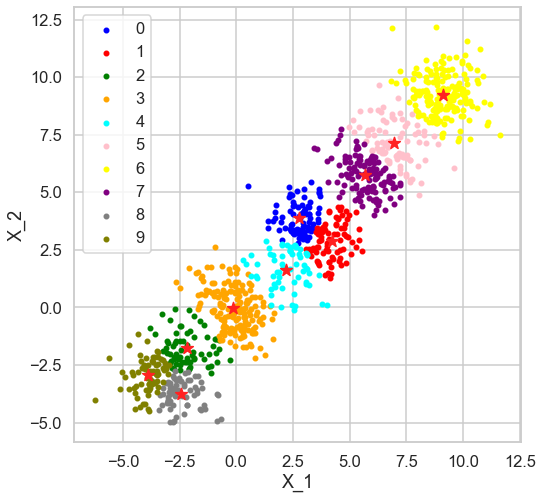

Final Cluster Distance:[0.61932715 0.3531098  0.72974158 0.87253834 0.65226503 0.68265862
 1.2071234  1.02783108 0.28041381 1.46821776 1.03566537 0.84153371
 0.3635813  0.40420465 0.46121598 1.56870843 0.6619993  0.52996131
 1.26097331 0.44720273 0.93861835 0.82443281 0.96546484 1.09489826
 1.03624913 0.44459731 0.60028493 0.35200039 0.37078409 0.56244521
 0.48851066 1.26839279 0.13409149 0.93420972 0.2381409  0.56880337
 0.93573228 1.87917318 0.66563277 1.32567812 0.7474791  0.93374113
 0.56574664 0.89896132 0.59081877 0.78164105 0.43338068 1.19945889
 1.05120894 0.76954313 0.69916409 0.91812297 0.82005967 1.48493656
 0.7485119  1.01833451 1.46175909 0.75263039 0.73730591 0.56329175
 0.26760043 1.05267541 0.99782208 0.62822522 0.53591746 0.6470095
 0.44675592 1.49410842 0.39672033 0.53472985 0.61394078 0.71538231
 0.72617051 1.41611566 0.97886466 1.0549686  0.28489161 0.28360897
 1.27433482 0.66591766 0.73460651 0.58845966 0.82137044 0.67275426
 0.81945988 0.87183488 0.87450407 0.6856

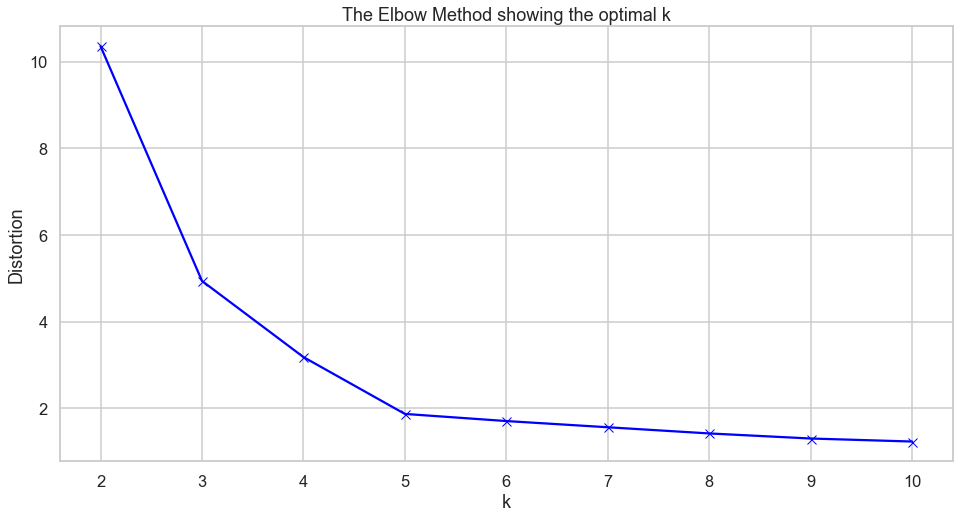

[10.353898579046897, 4.937314260192348, 3.181087931176236, 1.8689147767478098, 1.7044607619856849, 1.5612669324296808, 1.4185857261148724, 1.3015192935942081, 1.2319562565558322]


In [10]:
#Example2(Ecluidian distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( X2, i, "Ecluidian distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)

In [ ]:
#Conclusion
#best k value is k=5

For K=2 


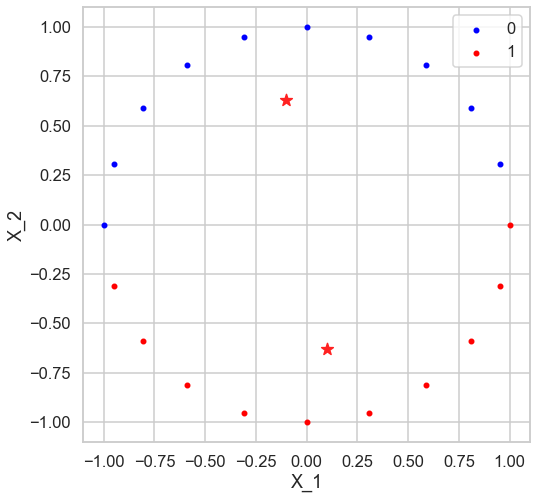

Final Cluster Distance:[1.09937918 1.09937918 0.91006152 0.71035567 0.5191253  0.38194801
 0.38194801 0.5191253  0.71035567 0.91006152 1.09937918 1.09937918
 0.91006152 0.71035567 0.5191253  0.38194801 0.38194801 0.5191253
 0.71035567 0.91006152]
Distortion Function:0.5913654181093859
 
For K=3 


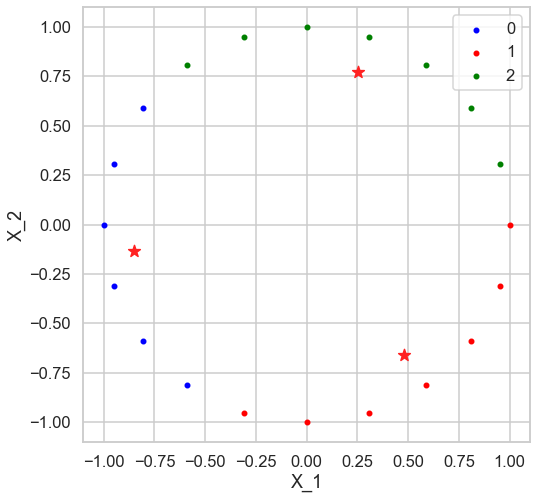

Final Cluster Distance:[0.83996083 0.83996083 0.5878037  0.33817965 0.18632607 0.33817965
 0.5878037  0.83996083 0.72385871 0.45492042 0.20071354 0.20071354
 0.45492042 0.72385871 0.83996083 0.5878037  0.33817965 0.18632607
 0.33817965 0.5878037 ]
Distortion Function:0.31367530727855836
 
For K=4 


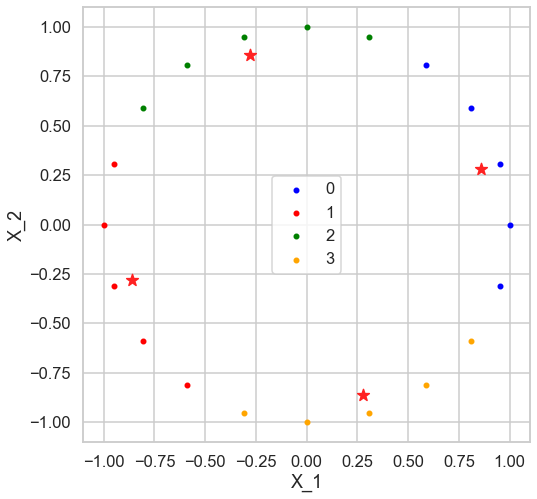

Final Cluster Distance:[0.31257487 0.0959706  0.31257487 0.59541486 0.59541486 0.31257487
 0.0959706  0.31257487 0.59541486 0.59541486 0.31257487 0.0959706
 0.31257487 0.59541486 0.59541486 0.31257487 0.0959706  0.31257487
 0.59541486 0.59541486]
Distortion Function:0.18273083621877192
 
For K=5 


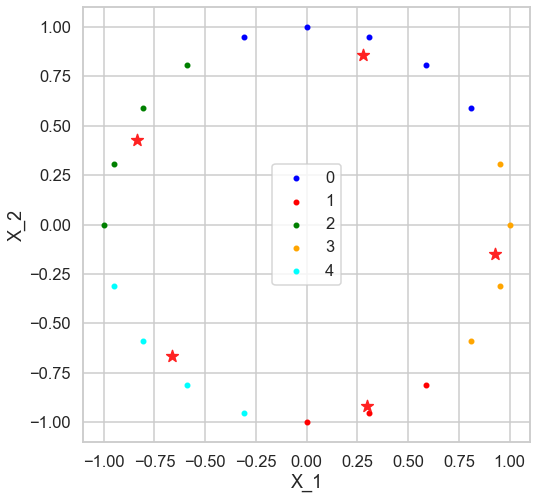

Final Cluster Distance:[0.16373327 0.45655692 0.59541486 0.31257487 0.0959706  0.31257487
 0.59541486 0.45655692 0.16373327 0.16373327 0.45655692 0.45655692
 0.16373327 0.16373327 0.45655692 0.30944736 0.03262899 0.30944736
 0.45655692 0.16373327]
Distortion Function:0.12588754891126402
 
For K=6 


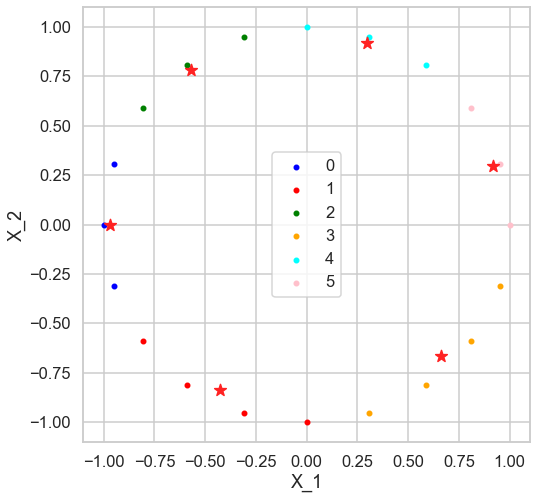

Final Cluster Distance:[0.30944736 0.03262899 0.30944736 0.30944736 0.03262899 0.30944736
 0.30944736 0.03262899 0.30944736 0.30944736 0.03262899 0.30944736
 0.45655692 0.16373327 0.16373327 0.45655692 0.45655692 0.16373327
 0.16373327 0.45655692]
Distortion Function:0.08556655690824128
 
For K=7 


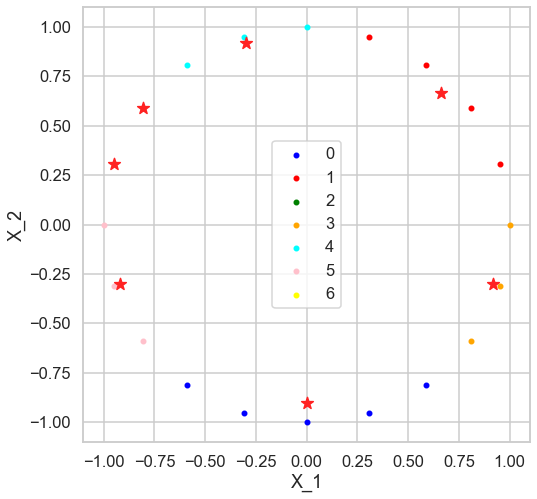

Final Cluster Distance:[0.30944736 0.45655692 0.16373327 0.16373327 0.45655692 0.30944736
 0.03262899 0.30944736 0.         0.         0.30944736 0.03262899
 0.30944736 0.59541486 0.31257487 0.0959706  0.31257487 0.59541486
 0.30944736 0.03262899]
Distortion Function:0.09809498660997182
 
For K=8 


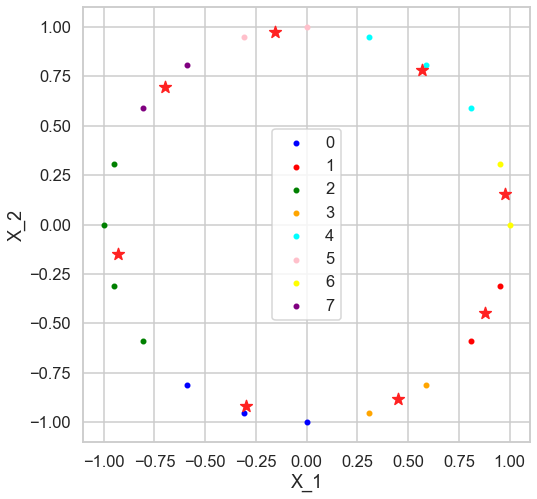

Final Cluster Distance:[0.15643447 0.15643447 0.30944736 0.03262899 0.30944736 0.15643447
 0.15643447 0.15643447 0.15643447 0.45655692 0.16373327 0.16373327
 0.45655692 0.30944736 0.03262899 0.30944736 0.15643447 0.15643447
 0.15643447 0.15643447]
Distortion Function:0.05501914938033224
 
For K=9 


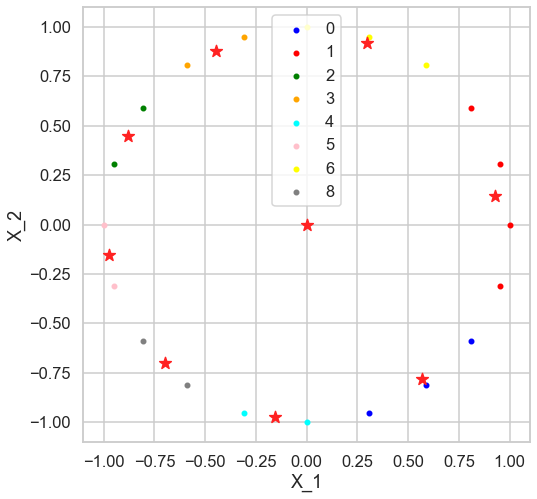

Final Cluster Distance:[0.16373327 0.16373327 0.45655692 0.30944736 0.03262899 0.30944736
 0.15643447 0.15643447 0.15643447 0.15643447 0.15643447 0.15643447
 0.15643447 0.15643447 0.15643447 0.15643447 0.30944736 0.03262899
 0.30944736 0.45655692]
Distortion Function:0.055019149380332255
 
For K=10 


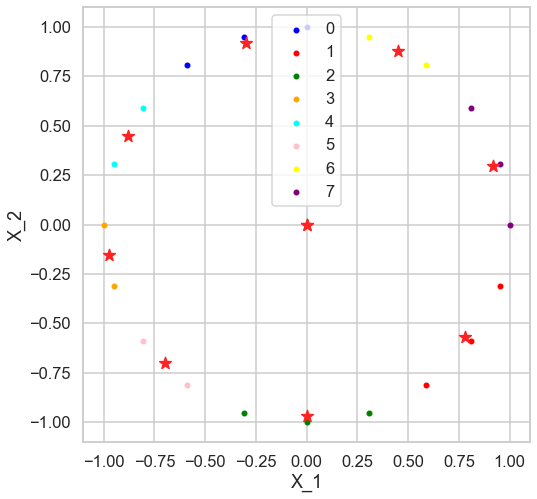

Final Cluster Distance:[0.30944736 0.03262899 0.30944736 0.15643447 0.15643447 0.30944736
 0.03262899 0.30944736 0.15643447 0.15643447 0.15643447 0.15643447
 0.15643447 0.15643447 0.30944736 0.03262899 0.30944736 0.30944736
 0.03262899 0.30944736]
Distortion Function:0.048304693145602
 


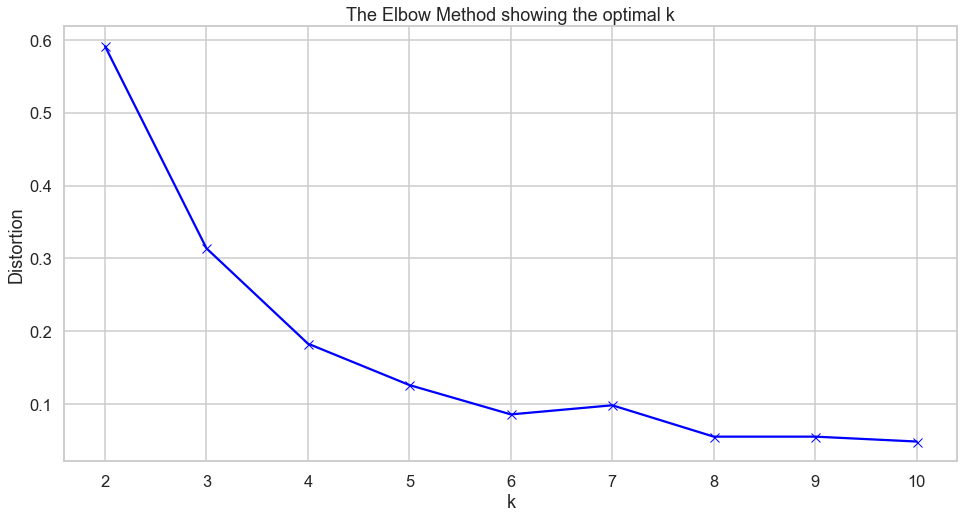

[0.5913654181093859, 0.31367530727855836, 0.18273083621877192, 0.12588754891126402, 0.08556655690824128, 0.09809498660997182, 0.05501914938033224, 0.055019149380332255, 0.048304693145602]


In [11]:
#Example1(Ecluidian distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( X1, i, "Ecluidian distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
    
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)

In [ ]:
#Conclusion
#best k value is k=6

In [ ]:
#Example 3 (pearson distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( X3, i, "pearson distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)

For K=2 


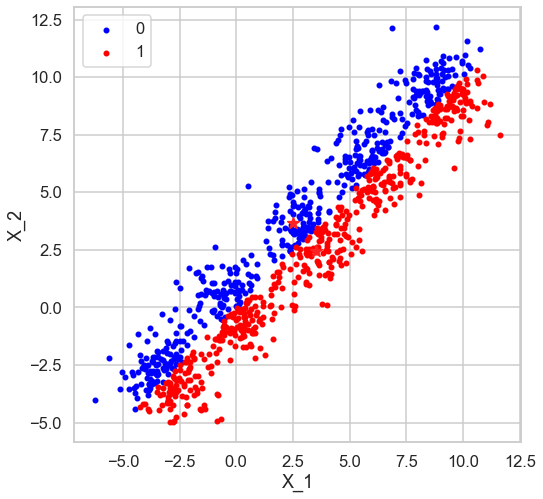

Final Cluster Distance:[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 2.22044605e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 1.11022302e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 

In [ ]:
#Example2(pearson distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( X2, i, "pearson distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)

For K=2 


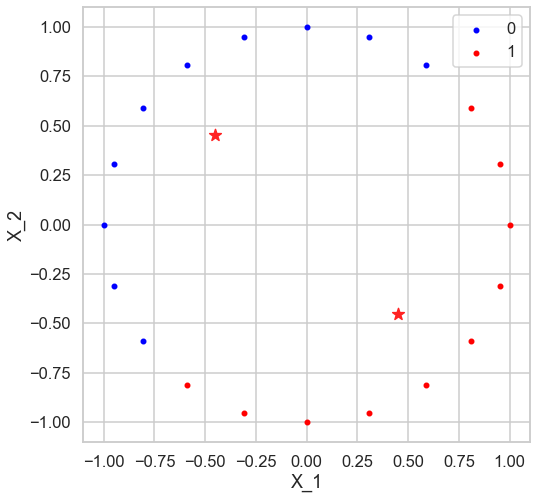

Final Cluster Distance:[0.00000000e+00 2.22044605e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:5.5466782398352394e-33
 
For K=3 


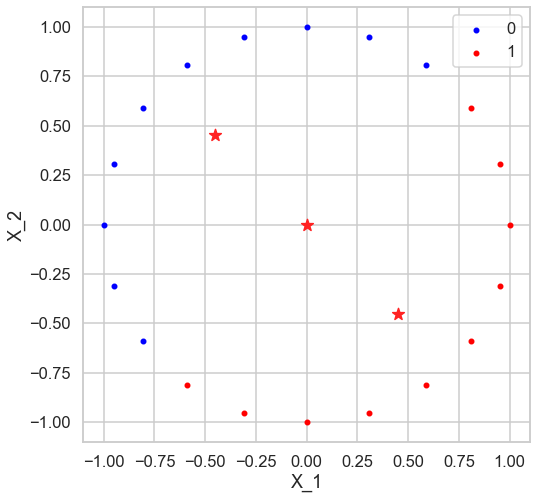

Final Cluster Distance:[0.00000000e+00 2.22044605e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:5.5466782398352394e-33
 
For K=4 


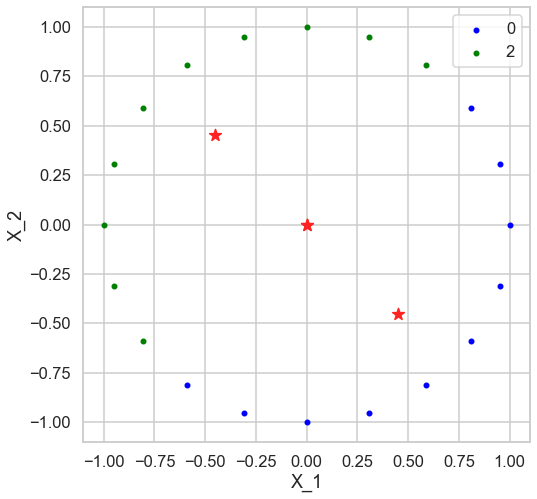

Final Cluster Distance:[0.00000000e+00 2.22044605e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:5.5466782398352394e-33
 
For K=5 


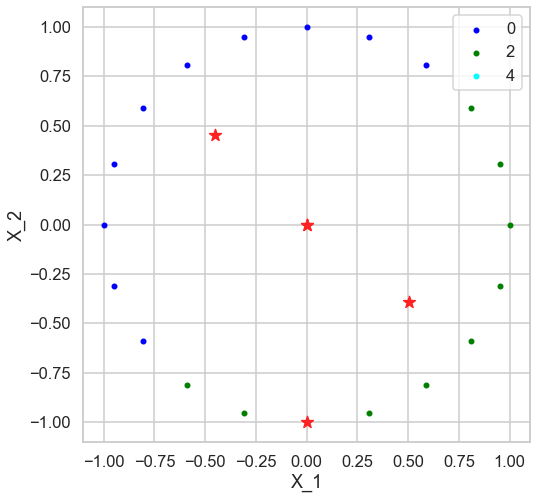

Final Cluster Distance:[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:3.697785493223493e-33
 
For K=6 


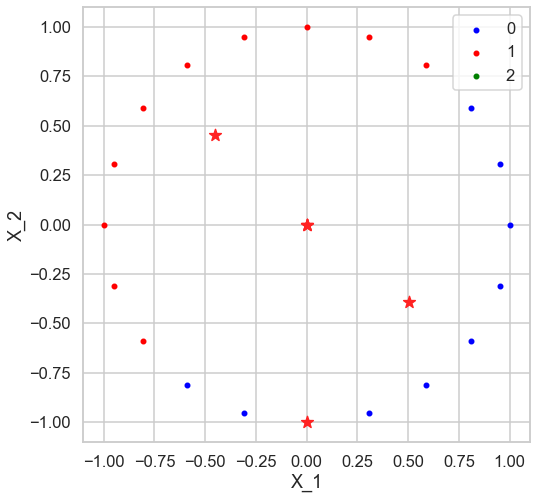

Final Cluster Distance:[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:3.697785493223493e-33
 
For K=7 


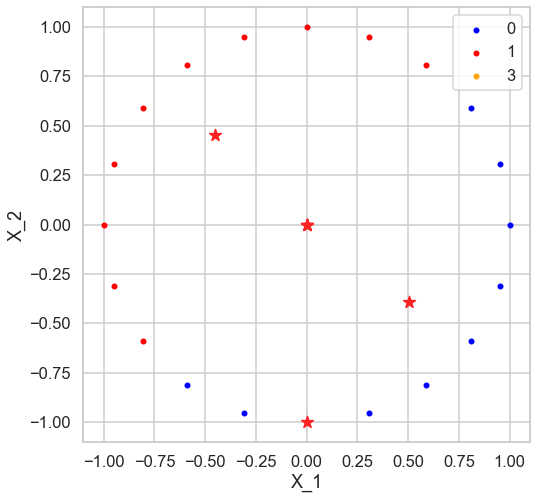

Final Cluster Distance:[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:3.697785493223493e-33
 
For K=8 


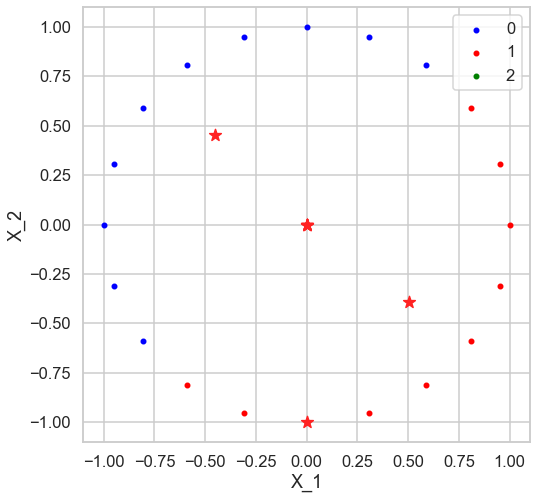

Final Cluster Distance:[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:3.697785493223493e-33
 
For K=9 


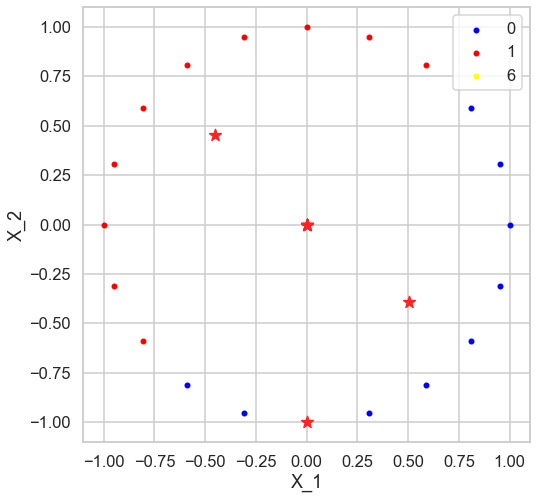

Final Cluster Distance:[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:3.697785493223493e-33
 
For K=10 


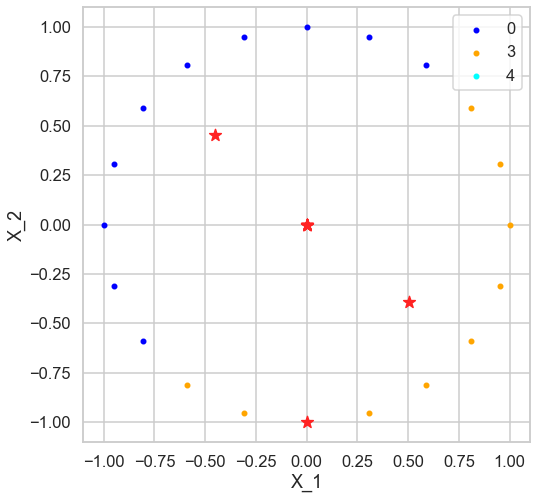

Final Cluster Distance:[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Distortion Function:3.697785493223493e-33
 


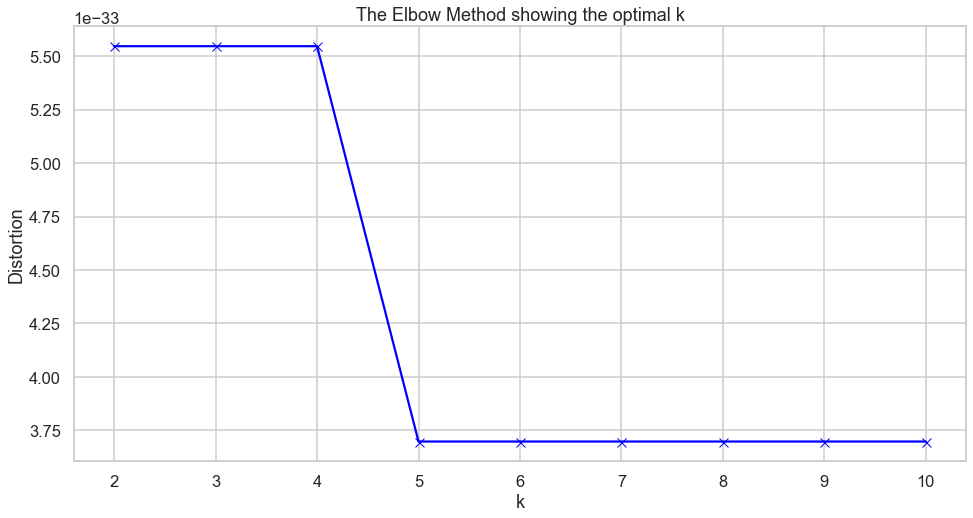

[5.5466782398352394e-33, 5.5466782398352394e-33, 5.5466782398352394e-33, 3.697785493223493e-33, 3.697785493223493e-33, 3.697785493223493e-33, 3.697785493223493e-33, 3.697785493223493e-33, 3.697785493223493e-33]


In [17]:
#Example1(pearson distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( X1, i, "pearson distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
    
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)

In [ ]:
##Conclusion
#best k value is k=5

In [ ]:
#centroids=[[1,4,6],[8,2,1]]
#points=[[3,6,2],[1,5,7],[7,2,1]]
#pearson=GUC_Distance ( centroids, points, "pearson" )
#print(pearson)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

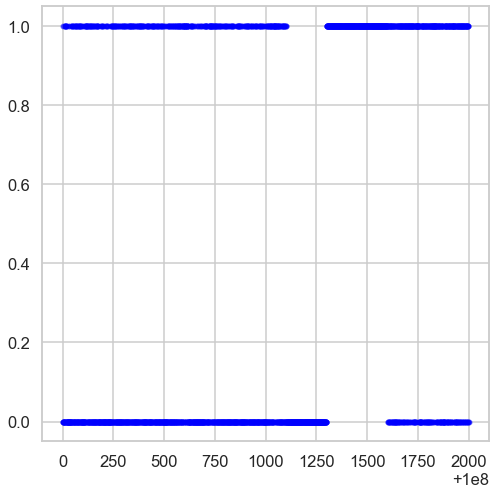

In [14]:
my_data = pd.read_csv("Customer data.csv")
 
display_cluster(my_data. to_numpy())

For K=2 


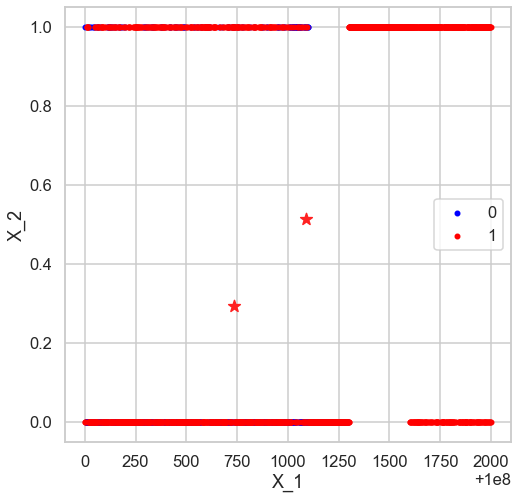

Final Cluster Distance:[20765.98205046 19794.68971399 14762.8043386  ... 17556.11584303
  6033.41203065 35528.2979902 ]
Distortion Function:607593721.7298033
 
For K=3 


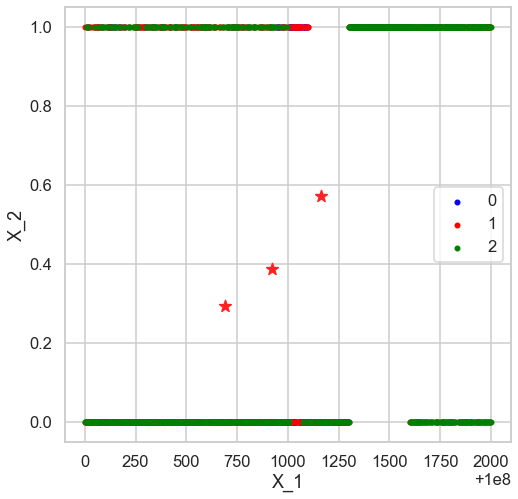

Final Cluster Distance:[ 6744.89709981 19442.83687014  1708.53207942 ...  4148.49164813
  7550.6480529  22063.57266521]
Distortion Function:336826826.7802636
 
For K=4 


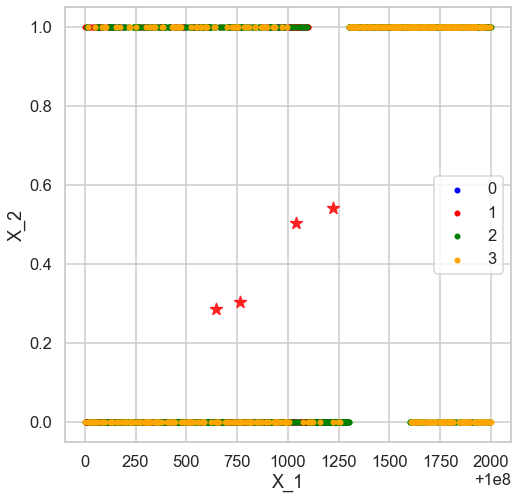

Final Cluster Distance:[ 9836.54114346  3547.65909073 10087.84384069 ...  7245.70135059
 16947.62484464 10808.10662889]
Distortion Function:188856782.51145086
 
For K=5 


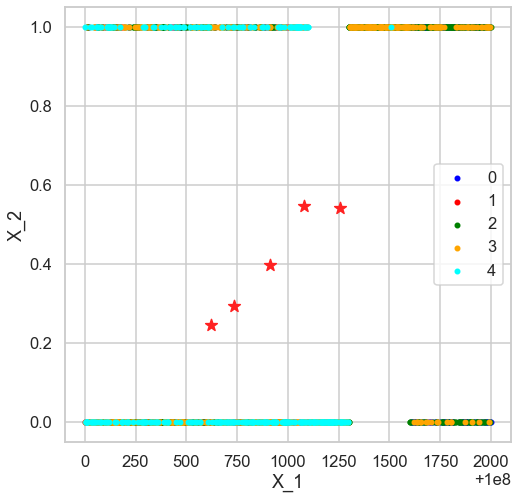

Final Cluster Distance:[ 7253.31436441 17433.29966444 14886.55401546 ... 12046.3136663
  7918.66752744  6006.46610654]
Distortion Function:124794669.00934182
 
For K=6 


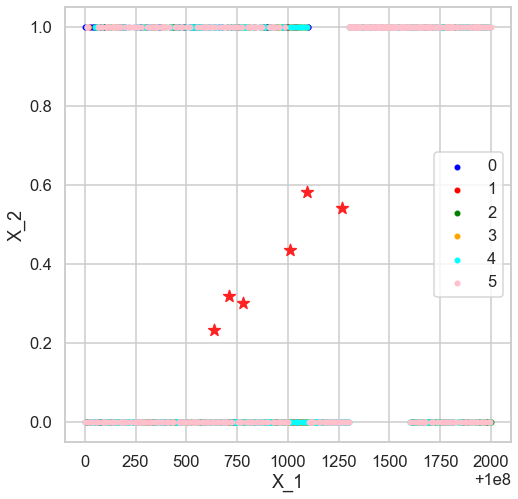

Final Cluster Distance:[ 2693.67894749  3561.27145874 11618.61732999 ... 14405.26625323
  2950.45738001  3115.70960234]
Distortion Function:94020844.71022192
 
For K=7 


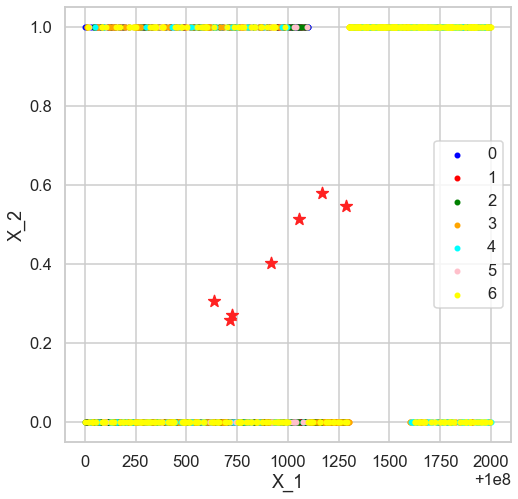

Final Cluster Distance:[ 7121.41161143 11336.51087579  2923.13662588 ...  5554.42334916
  6133.07711569  1590.46211125]
Distortion Function:65073304.514394924
 
For K=8 


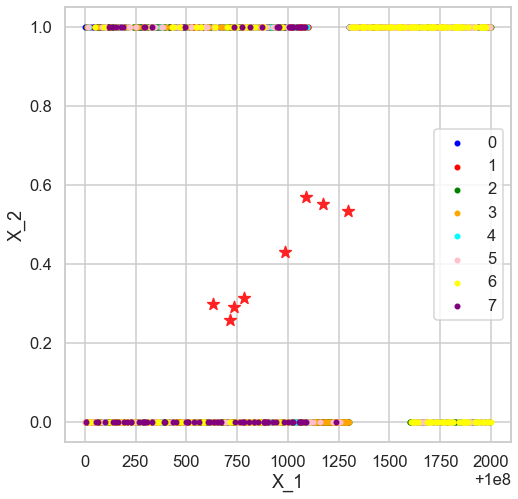

Final Cluster Distance:[1204.08974163 6713.6045155  1698.94914538 ... 1781.71818118 8659.52549357
 3484.94430772]
Distortion Function:48486256.69414112
 
For K=9 


KeyboardInterrupt: 

In [16]:
#customer data (Ecluidian distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( my_data.to_numpy(), i, "Ecluidian distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)


In [ ]:
#customer data (pearson distance)
distortion_functions=[]
for i in range(2,11):
    print('For K={} '.format(i))
    
    Final_Cluster_Distance,Cluster_Metric=GUC_Kmean ( my_data.to_numpy(), i, "pearson distance")
    print("Final Cluster Distance:{}".format(Final_Cluster_Distance))
    print("Distortion Function:{}".format(Cluster_Metric))
    print(" ")
    distortion_functions.append(Cluster_Metric)
#Elbow Method
k=[2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(16,8))
plt.plot(k, distortion_functions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortion_functions)

In [ ]:
#comments on the code
#I wanted to run k-means 100 times to make the choice of the min distortion function more accurate but since the runtime was too big I choose to loop only 10 times
#since the runtime was too large(it can take a full day) (even after choosing to run it only 10 times)I only choose parts of the code to run (examples1,2,3 and customer data with ecludian distance and example 1 with pearson distance), but if you try and run the rest ,it will work and produce the same result